# King County House Price Prediction using Linear Regression Model with Polynomial Features 

## Context
King county house price is a dataset which contain information about house price in King County area and information about the property specification. 

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository): 
    
    id - Unique ID for each home sold
    date - Date of the home sale
    price - Price of each home sold
    bedrooms - Number of bedrooms
    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    sqft_living - Square footage of the apartments interior living space
    sqft_lot - Square footage of the land space
    floors - Number of floors
    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    view - An index from 0 to 4 of how good the view of the property was
    condition - An index from 1 to 5 on the condition of the apartment,
    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    sqft_above - The square footage of the interior housing space that is above ground level
    sqft_basement - The square footage of the interior housing space that is below ground level
    yr_built - The year the house was initially built
    yr_renovated - The year of the house’s last renovation
    zipcode - What zipcode area the house is in
    lat - Lattitude
    long - Longitude
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Problem Statement

As a property agent, it is crucial to know the best value of a house so we could get highest profit from selling house and lowest investment when buying house. 

We could infer the main problems that we could solve with predicting King County house price with machine learning model is to know the house price estimation based on the house specification so we have a better standing if we want appraise house and get the best price.


## Goals

1. Create a machine learning model using Linear Regression to predict King County House Price based on house specification
2. Improve machine learning model using Polynomial Features
3. Improve machine learning model using Ridge/Lasso/Elasticnet 
4. Create evalution matrix to determine the best machine learning model to predict King County House Price

---

## Import Package

In [26]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")

---

## Import Dataset

In [27]:
# Load king county house price dataset
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---

## Data Understanding 

In [28]:
# Show info about each column's datatypes and number of Non-Null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
# Show info about empty cell for each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
# Descriptive statistic of boston dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [31]:
# Show unique data summary for each column
bsDesc=[]

for i in df.columns:
        bsDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((df[i].isna().sum()/len(df))*100,2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

pd.DataFrame(data=bsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,id,int64,0,0.0,21436,"[6917700650, 9346930250]"
1,date,object,0,0.0,372,"[20140726T000000, 20141210T000000]"
2,price,float64,0,0.0,4028,"[1538000.0, 2027000.0]"
3,bedrooms,int64,0,0.0,13,"[0, 5]"
4,bathrooms,float64,0,0.0,30,"[1.25, 5.75]"
5,sqft_living,int64,0,0.0,1038,"[1782, 1233]"
6,sqft_lot,int64,0,0.0,9782,"[1379, 9023]"
7,floors,float64,0,0.0,6,"[1.5, 2.0]"
8,waterfront,int64,0,0.0,2,"[1, 0]"
9,view,int64,0,0.0,5,"[4, 1]"


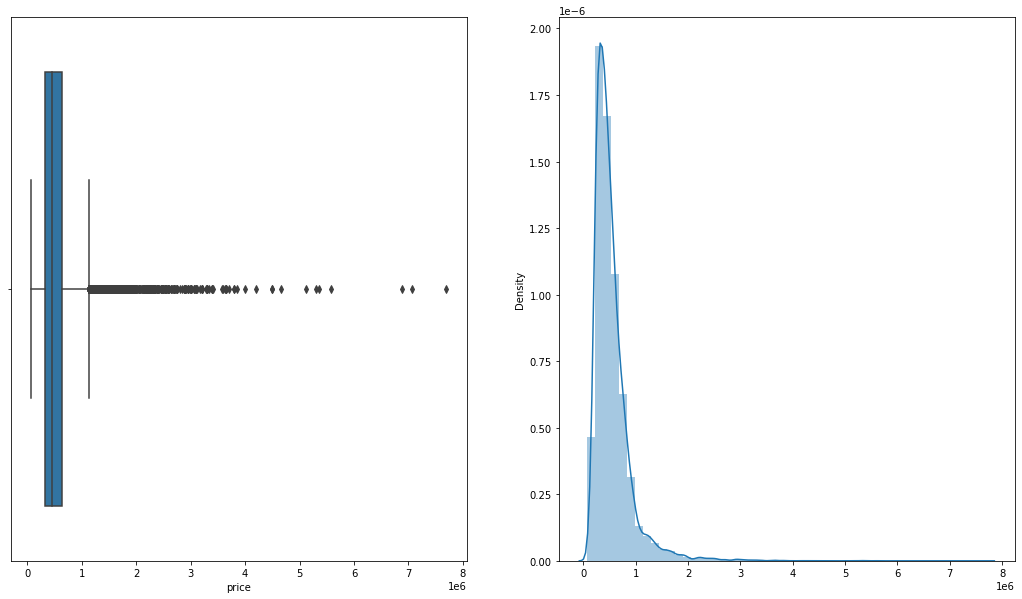

In [32]:
# Show the distribution of Price column
fig, axes = plt.subplots(1,2,figsize=(18, 10))
sns.boxplot(ax=axes[0], x=df['price'])
sns.distplot(ax=axes[1], x=df['price'])
plt.show()

In [33]:
# Show the duplicates from the key columns ('id')
duplicates=df.duplicated(subset = 'id', keep = False)
df[duplicates]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


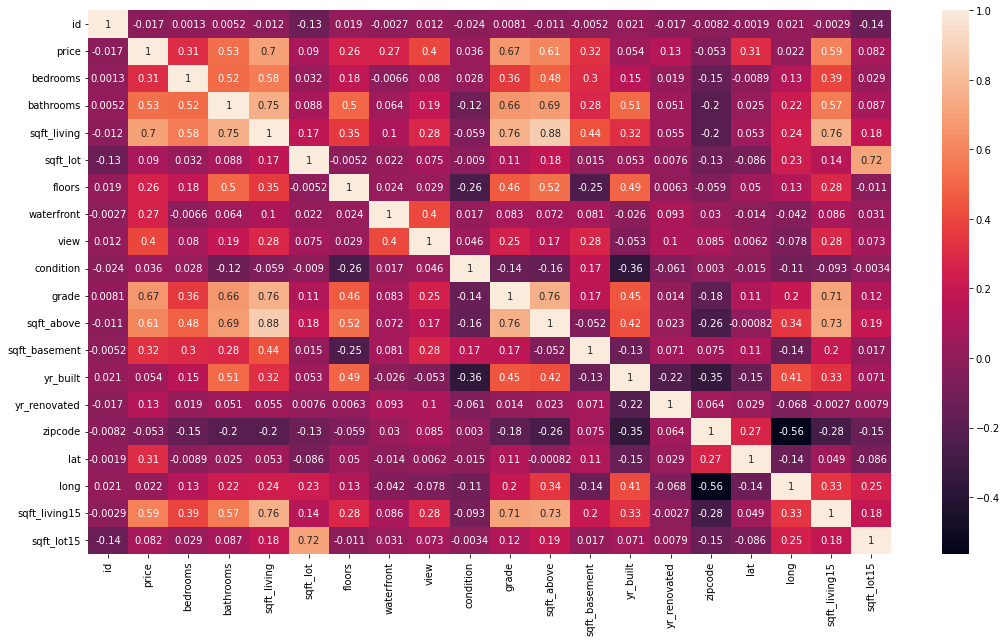

In [34]:
# Show the corellation of each column
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:>

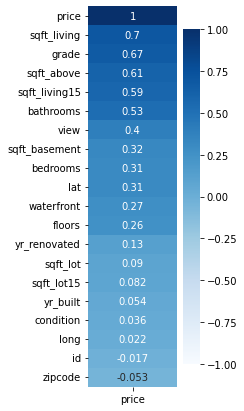

In [35]:
# Correlation with target
plt.figure(figsize=(2, 7))
sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

From the Data Understanding above, we know that
1. This dataset doesn't have any null value, so dealing with missing data is no necessary
2. There are some duplicates in 'id' column which supposed to be a unique identifier for each data. We have to clean the duplicates before using the data. 
3. `floors`, `bathrooms`, and `price` columns datatype supposed to be integer with rounded value, we have to change the data types.  


---

## Data Cleaning

### Date Time Handling

In [36]:
df['day_sold']=pd.to_datetime(df['date']).dt.day
df['month_sold']=pd.to_datetime(df['date']).dt.month
df['year_sold']=pd.to_datetime(df['date']).dt.year
df.drop(columns='date', inplace=True)

### Duplicates Handling

In [37]:
## Subset the dataframe without the duplicates row
duplicates=df.duplicated(subset = 'id', keep = False)
df=df[~duplicates]

In [38]:
## Check if there are still any duplicates in dataset
print(f'Number of Duplicates: {df[duplicates].shape[0]}')

Number of Duplicates: 0


### Data Types Handling

In [39]:
## Change columns with false data type
df['price']=df['price'].round(0).astype('int')
df['floors']=df['floors'].round(0).astype('int')
df['bathrooms']=df['bathrooms'].round(0).astype('int')

In [40]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
0,7129300520,221900,3,1,1180,5650,1,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,538000,3,2,2570,7242,2,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,180000,2,1,770,10000,1,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,604000,4,3,1960,5000,1,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,510000,3,2,1680,8080,1,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015


---

## Splitting Data

In [41]:
# Set feature and target variable
x=df.drop(columns=['price','id'])
y=df['price']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x, y ,test_size=.2, random_state=42)

In [44]:
# Show feature train set
x_train.head() 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
11670,4,2,1100,11824,1,0,0,4,7,1100,...,1954,0,98006,47.5704,-122.141,1380,11796,1,8,2014
17654,3,2,1390,11700,1,0,0,4,7,1390,...,1966,0,98033,47.7002,-122.192,1060,8686,23,3,2015
6066,3,2,1560,5223,1,0,0,4,7,810,...,1940,0,98125,47.7175,-122.288,1440,8491,23,6,2014
7658,3,2,1730,13040,1,0,0,4,8,1290,...,1988,0,98052,47.6809,-122.119,1730,11016,9,10,2014
2193,3,3,3530,69834,2,0,0,3,10,3530,...,1994,0,98053,47.6377,-121.995,3560,74256,14,10,2014


In [45]:
# Show feature test set
x_test.head() 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
19191,4,2,2220,15600,1,0,0,5,7,1140,...,1963,0,98056,47.4920,-122.166,1670,4800,15,7,2014
1740,3,2,2930,33981,2,0,2,3,9,2930,...,2000,0,98059,47.5151,-122.120,3720,35230,7,11,2014
379,3,2,1300,3348,2,0,0,3,7,1300,...,1904,2014,98144,47.5920,-122.307,1590,2577,21,4,2015
1728,3,2,2060,15837,2,0,0,3,6,2060,...,1903,0,98055,47.4819,-122.223,2190,8549,4,6,2014
13789,3,2,3100,11985,1,0,0,4,7,1790,...,1963,0,98198,47.3825,-122.310,1770,7954,17,11,2014


In [46]:
# Show target train set
y_train.head() 

11670    320000
17654    450000
6066     399950
7658     500000
2193     760000
Name: price, dtype: int32

In [47]:
# Show target test set
y_test.head()

19191    374000
1740     785000
379      435000
1728     200000
13789    302500
Name: price, dtype: int32

In [48]:
# Show train and test composition

In [49]:
x_train.shape

(17008, 21)

In [50]:
x_test.shape

(4252, 21)

---

## Machine Learning Modelling - Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# Load Linear Regression Model
Model = LinearRegression(fit_intercept=True)

In [53]:
# Fit train set into model
Model.fit(x_train, y_train)

LinearRegression()

In [54]:
# Determine accuracy score from train set 
Model.score(x_train, y_train)  

0.7019932073468105

In [55]:
# Check Evaluation Matrix Result

In [56]:
## Create function for evaluation matrix
def Eva_Matrix(Model,x,y_true):
    y_pred=Model.predict(x)
    R2=r2_score(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    MSE=mean_squared_error(y_true,y_pred)
    RMSE=np.sqrt(MSE)
    return R2,MAE,MSE,RMSE

In [57]:
## Linear Regression Training
r2_LR_train,MAE_LR_train,MSE_LR_train,RMSE_LR_train=Eva_Matrix(Model,x_train,y_train)
## Linear Regression Testing
r2_LR_test,MAE_LR_test,MSE_LR_test,RMSE_LR_test=Eva_Matrix(Model,x_test,y_test)

In [58]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Linear Regression Training':[r2_LR_train,MAE_LR_train,MSE_LR_train,RMSE_LR_train],
    'Linear Regression Testing':[r2_LR_test,MAE_LR_test,MSE_LR_test,RMSE_LR_test],
}
summaryLinReg=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summaryLinReg.T

,R-Squared,MAE,MSE,RMSE
Linear Regression Training,0.7,125654.61,4.039183e+10,200977.18
Linear Regression Testing,0.7,127524.43,4.011679e+10,200291.76


---

## Improvement ML 1 - Polynomial Feature

In [59]:
## Import polynomial feature package
from sklearn.preprocessing import PolynomialFeatures

In [60]:
Poli=PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)

In [61]:
Poli=Poli.fit(x_train)

In [62]:
x_train_poli=Poli.transform(x_train)

In [63]:
x_test_poli=Poli.transform(x_test)

In [64]:
df_xtrainpoli=pd.DataFrame(x_train_poli)
df_xtrainpoli.head()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,4.0,2.0,1100.0,11824.0,1.0,0.0,0.0,4.0,7.0,1100.0,...,16278480.0,1380.0,11040.0,2779320.0,11796.0,94368.0,23757144.0,8.0,2014.0,16112.0
1,3.0,2.0,1390.0,11700.0,1.0,0.0,0.0,4.0,7.0,1390.0,...,9207160.0,24380.0,3180.0,2135900.0,199778.0,26058.0,17502290.0,69.0,46345.0,6045.0
2,3.0,2.0,1560.0,5223.0,1.0,0.0,0.0,4.0,7.0,810.0,...,12227040.0,33120.0,8640.0,2900160.0,195293.0,50946.0,17100874.0,138.0,46322.0,12084.0
3,3.0,2.0,1730.0,13040.0,1.0,0.0,0.0,4.0,8.0,1290.0,...,19057680.0,15570.0,17300.0,3484220.0,99144.0,110160.0,22186224.0,90.0,18126.0,20140.0
4,3.0,3.0,3530.0,69834.0,2.0,0.0,0.0,3.0,10.0,3530.0,...,264351360.0,49840.0,35600.0,7169840.0,1039584.0,742560.0,149551584.0,140.0,28196.0,20140.0


In [66]:
df_xtestpoli=pd.DataFrame(x_test_poli)
df_xtestpoli.head()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,4.0,2.0,2220.0,15600.0,1.0,0.0,0.0,5.0,7.0,1140.0,...,8016000.0,25050.0,11690.0,3363380.0,72000.0,33600.0,9667200.0,105.0,30210.0,14098.0
1,3.0,2.0,2930.0,33981.0,2.0,0.0,2.0,3.0,9.0,2930.0,...,131055600.0,26040.0,40920.0,7492080.0,246610.0,387530.0,70953220.0,77.0,14098.0,22154.0
2,3.0,2.0,1300.0,3348.0,2.0,0.0,0.0,3.0,7.0,1300.0,...,4097430.0,33390.0,6360.0,3203850.0,54117.0,10308.0,5192655.0,84.0,42315.0,8060.0
3,3.0,2.0,2060.0,15837.0,2.0,0.0,0.0,3.0,6.0,2060.0,...,18722310.0,8760.0,13140.0,4410660.0,34196.0,51294.0,17217686.0,24.0,8056.0,12084.0
4,3.0,2.0,3100.0,11985.0,1.0,0.0,0.0,4.0,7.0,1790.0,...,14078580.0,30090.0,19470.0,3564780.0,135218.0,87494.0,16019356.0,187.0,34238.0,22154.0


In [67]:
# Load Linear Regression Model
Model_2 = LinearRegression(fit_intercept=True)

In [68]:
# Fit train set into model
Model_2.fit(df_xtrainpoli, y_train)

LinearRegression()

In [69]:
# Determine accuracy score from train set 
Model_2.score(df_xtrainpoli, y_train)  

0.8151503652980534

In [70]:
## Linear Regression with Polynomial Feature
r2_LR_1_PF_train,MAE_LR_1_PF_train,MSE_LR_1_PF_train,RMSE_LR_1_PF_train=Eva_Matrix(Model_2,df_xtrainpoli,y_train)
## Linear Regression wi|th Polynomial Feature
r2_LR_1_PF_test,MAE_LR_1_PF_test,MSE_LR_1_PF_test,RMSE_LR_1_PF_test=Eva_Matrix(Model_2,df_xtestpoli,y_test)

In [71]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'LinReg after Polynomial Feature Training':[r2_LR_1_PF_train,MAE_LR_1_PF_train,MSE_LR_1_PF_train,RMSE_LR_1_PF_train],
    'LinReg after Polynomial Feature Testing':[r2_LR_1_PF_test,MAE_LR_1_PF_test,MSE_LR_1_PF_test,RMSE_LR_1_PF_test]
}
summaryPoli=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summaryPoli.T

,R-Squared,MAE,MSE,RMSE
LinReg after Polynomial Feature Training,0.82,102942.49,2.505451e+10,158286.17
LinReg after Polynomial Feature Testing,0.80,105625.34,2.733056e+10,165319.58


---

## Improvement ML 2 - Regularization

In [75]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

### Ridge Modeling

In [76]:
ModelR=Ridge()

In [78]:
ModelR.fit(df_xtrainpoli,y_train)

Ridge()

#### Tuning Ridge

In [79]:
# param_a=np.arange(0.01,3,0.01)
param_a=[0,0.0001,0.001,0.01,0.1,1,2,3,5,10,100]

In [81]:
train_r = []
test_r = []

for i in param_a: # Melooping nilai dari param_a
    ModelR_ft=Ridge(alpha=i) # Define Model dengan nilai Alpha sesuai nilai i (looping)
    ModelR_ft.fit(df_xtrainpoli,y_train) # Training Model
    y_pred_tr=ModelR_ft.predict(df_xtrainpoli) # Model Predict data Training
    R2_train=r2_score(y_train,y_pred_tr) # Evaluation Matrix Data Training
    train_r.append(R2_train) # Memasukkan Hasil Eva Matrix ke list Training
    y_pred_ts=ModelR_ft.predict(df_xtestpoli) # Model Predict data testing
    R2_test=r2_score(y_test,y_pred_ts) #Evaluation Matrix Data Testing
    test_r.append(R2_test) # Memasukan Hasil Eva Matrix Data Testing ke Testing List


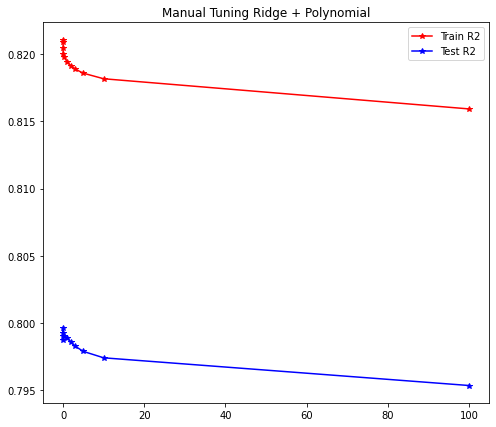

In [82]:
plt.figure(figsize=(8,7))
plt.plot(param_a,train_r,'r*-')
plt.plot(param_a,test_r,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning Ridge + Polynomial')
plt.show()

In [83]:
ModelR_ft=Ridge(alpha=param_a[np.argmax(test_r)]) # Define Model dengan nilai Alpha sesuai nilai alpha maximum
ModelR_ft.fit(df_xtrainpoli,y_train) # Training Model

Ridge(alpha=0.0001)

In [84]:
## Ridge Training
r2_R_train,MAE_R_train,MSE_R_train,RMSE_R_train=Eva_Matrix(ModelR,df_xtrainpoli,y_train)
## Ridge Testing
r2_R_test,MAE_R_test,MSE_R_test,RMSE_R_test=Eva_Matrix(ModelR,df_xtestpoli,y_test)
## Ridge Tuning Training
r2_R_ft_train,MAE_R_ft_train,MSE_R_ft_train,RMSE_R_ft_train=Eva_Matrix(ModelR_ft,df_xtrainpoli,y_train)
## Ridge Tuning Testing
r2_R_ft_test,MAE_R_ft_test,MSE_R_ft_test,RMSE_R_ft_test=Eva_Matrix(ModelR_ft,df_xtestpoli,y_test)

In [85]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Ridge Training':[r2_R_train,MAE_R_train,MSE_R_train,RMSE_R_train],
    'Ridge Testing':[r2_R_test,MAE_R_test,MSE_R_test,RMSE_R_test],
    'Ridge with Tuning Training':[r2_R_ft_train,MAE_R_ft_train,MSE_R_ft_train,RMSE_R_ft_train],
    'Ridge with Tuning Testing':[r2_R_ft_test,MAE_R_ft_test,MSE_R_ft_test,RMSE_R_ft_test]
}
summaryRidge=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summaryRidge.T

,R-Squared,MAE,MSE,RMSE
Ridge Training,0.82,100608.24,2.447261e+10,156437.23
Ridge Testing,0.80,103716.14,2.704886e+10,164465.37
Ridge with Tuning Training,0.82,100413.95,2.427156e+10,155793.32
Ridge with Tuning Testing,0.80,103505.29,2.695027e+10,164165.37


### Lasso Modelling

In [86]:
ModelL=Lasso()

In [87]:
ModelL.fit(df_xtrainpoli,y_train)

Lasso()

#### Tuning Lasso

In [88]:
# param_a=np.arange(0.01,3,0.01)
param_a=[0,0.0001,0.001,0.01,0.1,1,2,3,5,10,100]

In [89]:
train_l = []
test_l = []

for i in param_a: # Melooping nilai dari param_a
    ModelL_ft=Lasso(alpha=i) # Define Model dengan nilai Alpha sesuai nilai i (looping)
    ModelL_ft.fit(df_xtrainpoli,y_train) # Training Model
    y_pred_tr=ModelL_ft.predict(df_xtrainpoli) # Model Predict data Training
    R2_train=r2_score(y_train,y_pred_tr) # Evaluation Matrix Data Training
    train_l.append(R2_train) # Memasukkan Hasil Eva Matrix ke list Training
    y_pred_ts=ModelL_ft.predict(df_xtestpoli) # Model Predict data testing
    R2_test=r2_score(y_test,y_pred_ts) #Evaluation Matrix Data Testing
    test_l.append(R2_test) # Memasukan Hasil Eva Matrix Data Testing ke Testing List


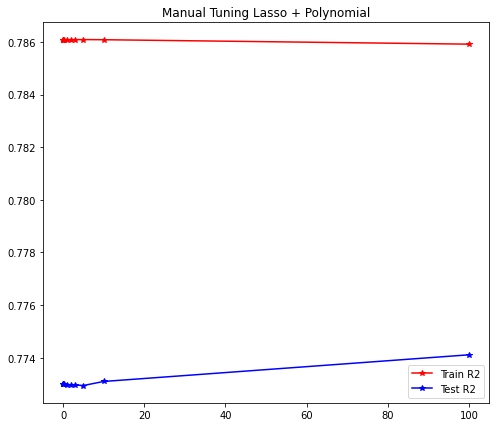

In [90]:
plt.figure(figsize=(8,7))
plt.plot(param_a,train_l,'r*-')
plt.plot(param_a,test_l,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning Lasso + Polynomial')
plt.show()

In [91]:
# Fit Lasso Model with hyperparameter tuning
ModelL_ft=Lasso(alpha=param_a[np.argmax(test_l)]) # Define Model dengan nilai Alpha sesuai nilai alpha maximum
ModelL_ft.fit(df_xtrainpoli,y_train) # Training Model

Lasso(alpha=100)

In [92]:

## Lasso Training
r2_L_train,MAE_L_train,MSE_L_train,RMSE_L_train=Eva_Matrix(ModelL,df_xtrainpoli,y_train)
## Lasso Testing
r2_L_test,MAE_L_test,MSE_L_test,RMSE_L_test=Eva_Matrix(ModelL,df_xtestpoli,y_test)
## Lasso Tuning Training
r2_L_ft_train,MAE_L_ft_train,MSE_L_ft_train,RMSE_L_ft_train=Eva_Matrix(ModelL_ft,df_xtrainpoli,y_train)
## Lasso Tuning Testing
r2_L_ft_test,MAE_L_ft_test,MSE_L_ft_test,RMSE_L_ft_test=Eva_Matrix(ModelL_ft,df_xtestpoli,y_test)


In [93]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'Lasso Training':[r2_L_train,MAE_L_train,MSE_L_train,RMSE_L_train],
    'Lasso Testing':[r2_L_test,MAE_L_test,MSE_L_test,RMSE_L_test],
    'Lasso with Tuning Training':[r2_L_ft_train,MAE_L_ft_train,MSE_L_ft_train,RMSE_L_ft_train],
    'Lasso with Tuning Testing':[r2_L_ft_test,MAE_L_ft_test,MSE_L_ft_test,RMSE_L_ft_test],
}
summaryLasso=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summaryLasso.T

,R-Squared,MAE,MSE,RMSE
Lasso Training,0.79,109443.63,2.899484e+10,170278.70
Lasso Testing,0.77,110889.98,3.053434e+10,174740.77
Lasso with Tuning Training,0.79,109496.65,2.901734e+10,170344.77
Lasso with Tuning Testing,0.77,110901.63,3.038222e+10,174304.95


### ElasticNet Modelling

In [94]:
ModelE=ElasticNet()

In [95]:
ModelE.fit(df_xtrainpoli,y_train)

ElasticNet()

#### Tuning ElasticNet

In [96]:
# param_a=np.arange(0.01,3,0.01)
param_a=[0,0.0001,0.001,0.01,0.1,1,2,3,5,10,100]

In [97]:
train_e = []
test_e = []

for i in param_a: # Melooping nilai dari param_a
    ModelE_ft=ElasticNet(alpha=i) # Define Model dengan nilai Alpha sesuai nilai i (looping)
    ModelE_ft.fit(df_xtrainpoli,y_train) # Training Model
    y_pred_tr=ModelE_ft.predict(df_xtrainpoli) # Model Predict data Training
    R2_train=r2_score(y_train,y_pred_tr) # Evaluation Matrix Data Training
    train_e.append(R2_train) # Memasukkan Hasil Eva Matrix ke list Training
    y_pred_ts=ModelE_ft.predict(df_xtestpoli) # Model Predict data testing
    R2_test=r2_score(y_test,y_pred_ts) #Evaluation Matrix Data Testing
    test_e.append(R2_test) # Memasukan Hasil Eva Matrix Data Testing ke Testing List


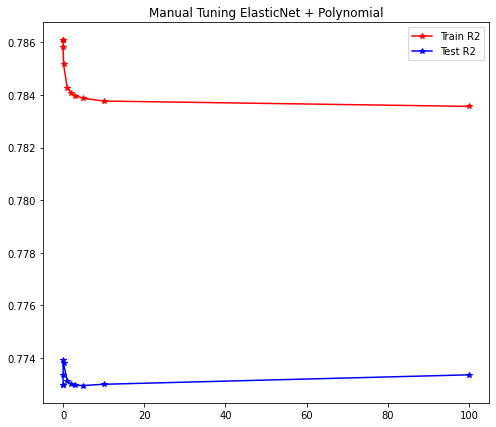

In [98]:
plt.figure(figsize=(8,7))
plt.plot(param_a,train_e,'r*-')
plt.plot(param_a,test_e,'b*-')
plt.legend(['Train R2','Test R2'])
plt.title('Manual Tuning ElasticNet + Polynomial')
plt.show()

In [101]:
ModelE_ft=ElasticNet(alpha=param_a[np.argmax(test_e)]) # Define Model dengan nilai Alpha sesuai nilai alpha maximum
ModelE_ft.fit(df_xtrainpoli,y_train) # Training Model

ElasticNet(alpha=0.01)

In [110]:
## ElasticNet Training
r2_E_train,MAE_E_train,MSE_E_train,RMSE_E_train=Eva_Matrix(ModelL,df_xtrainpoli,y_train)
## ElasticNet Testing
r2_E_test,MAE_E_test,MSE_E_test,RMSE_E_test=Eva_Matrix(ModelL,df_xtestpoli,y_test)
## ElasticNet Tuning Training
r2_E_ft_train,MAE_E_ft_train,MSE_E_ft_train,RMSE_E_ft_train=Eva_Matrix(ModelE_ft,df_xtrainpoli,y_train)
## ElasticNet Tuning Testing
r2_E_ft_test,MAE_E_ft_test,MSE_E_ft_test,RMSE_E_ft_test=Eva_Matrix(ModelE_ft,df_xtestpoli,y_test)

In [111]:
## EVALUATION MATRIX COMPARISON
eva_matrix={
    'ElasticNet Training':[r2_E_train,MAE_E_train,MSE_E_train,RMSE_E_train],
    'ElasticNet Testing':[r2_E_test,MAE_E_test,MSE_E_test,RMSE_E_test],
    'ElasticNet with Tuning Training':[r2_E_ft_train,MAE_E_ft_train,MSE_E_ft_train,RMSE_E_ft_train],
    'ElasticNet with Tuning Testing':[r2_E_ft_test,MAE_E_ft_test,MSE_E_ft_test,RMSE_E_ft_test]
}
summaryENet=pd.DataFrame(eva_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summaryENet.T

,R-Squared,MAE,MSE,RMSE
ElasticNet Training,0.79,109443.63,2.899484e+10,170278.70
ElasticNet Testing,0.77,110889.98,3.053434e+10,174740.77
ElasticNet with Tuning Training,0.79,109489.54,2.903109e+10,170385.12
ElasticNet with Tuning Testing,0.77,110834.23,3.040693e+10,174375.83


---

## Evaluation Matrix

In [112]:
summary=pd.concat([summaryLinReg,summaryPoli,summaryRidge,summaryLasso,summaryENet],axis=1)
summary.T

,R-Squared,MAE,MSE,RMSE
Linear Regression Training,0.70,125654.61,4.039183e+10,200977.18
Linear Regression Testing,0.70,127524.43,4.011679e+10,200291.76
LinReg after Polynomial Feature Training,0.82,102942.49,2.505451e+10,158286.17
LinReg after Polynomial Feature Testing,0.80,105625.34,2.733056e+10,165319.58
Ridge Training,0.82,100608.24,2.447261e+10,156437.23
Ridge Testing,0.80,103716.14,2.704886e+10,164465.37
Ridge with Tuning Training,0.82,100413.95,2.427156e+10,155793.32
Ridge with Tuning Testing,0.80,103505.29,2.695027e+10,164165.37
Lasso Training,0.79,109443.63,2.899484e+10,170278.70
Lasso Testing,0.77,110889.98,3.053434e+10,174740.77


---

## Summary
**The best Machine Learning Model to use to predict King County House Price is Ridge with Hyperparameter Tuning (alpha = 0.0001) with R2 score 0.80 and MAE score 103505**